In [185]:
import pandas as pd
import numpy as np

# Read in master CSV file
df = pd.read_csv('all_data.csv', index_col = 0)

# Drop columns with NaN
df = df.dropna(axis=1,how='any')
df.reset_index(drop=True, inplace=True)
df.head()

,inst_per_warp,kernelname,branch_efficiency,warp_execution_efficiency,warp_nonpred_execution_efficiency,inst_replay_overhead,shared_load_transactions_per_request,shared_store_transactions_per_request,local_load_transactions_per_request,local_store_transactions_per_request,...,single_precision_fu_utilization,double_precision_fu_utilization,flop_hp_efficiency,flop_sp_efficiency,flop_dp_efficiency,sysmem_read_utilization,sysmem_write_utilization,architecture,application_name,input
0,56.00056,bpnn_adjust_weights_cuda,1.0,0.999995,0.999994,0.002058,0.000000,0.000000,0.0,0.0,...,2,1,0.0,0.000000,0.047434,0,1,P100,backprop,-100000_bpnn_adjust_weights_cuda
1,184.00000,bpnn_layerforward_CUDA,1.0,0.943953,0.761888,0.000633,0.645833,0.696429,0.0,0.0,...,6,0,0.0,0.004695,0.000000,0,1,P100,backprop,-100000_bpnn_layerforward_CUDA
2,56.00560,bpnn_adjust_weights_cuda,1.0,0.999950,0.999948,0.016234,0.000000,0.000000,0.0,0.0,...,3,2,0.0,0.000000,0.043993,0,1,P100,backprop,-10000_bpnn_adjust_weights_cuda
3,184.00000,bpnn_layerforward_CUDA,1.0,0.943953,0.761888,0.006918,0.645833,0.696429,0.0,0.0,...,6,0,0.0,0.003017,0.000000,0,1,P100,backprop,-10000_bpnn_layerforward_CUDA
4,56.00056,bpnn_adjust_weights_cuda,1.0,0.999995,0.999994,0.002492,0.000000,0.000000,0.0,0.0,...,2,1,0.0,0.000000,0.048306,0,1,P100,backprop,-100016_bpnn_adjust_weights_cuda


In [186]:
# Define peak memory bandwidth p100 732
peak_mem_bw = {
    "V100": 898.048 * (1024*1024*1024),
    "P100": 749.0 * (1024*1024*1024),
}
mem_bw_thresh = 0.75

# Add a column specifying if the case is memory bound
df_archs = []
for arch in peak_mem_bw.keys():
    df_tmp = df[df["architecture"] == arch].copy()
    new_col = (
        df_tmp["dram_read_throughput"] + df_tmp["dram_write_throughput"]
    ) / peak_mem_bw[arch]
    new_col = new_col > mem_bw_thresh
    df_tmp["memory_bound"] = new_col
    df_archs.append(df_tmp.copy())
df_merged = pd.concat(df_archs).sort_index()
df_merged.head()

,inst_per_warp,kernelname,branch_efficiency,warp_execution_efficiency,warp_nonpred_execution_efficiency,inst_replay_overhead,shared_load_transactions_per_request,shared_store_transactions_per_request,local_load_transactions_per_request,local_store_transactions_per_request,...,double_precision_fu_utilization,flop_hp_efficiency,flop_sp_efficiency,flop_dp_efficiency,sysmem_read_utilization,sysmem_write_utilization,architecture,application_name,input,memory_bound
0,56.00056,bpnn_adjust_weights_cuda,1.0,0.999995,0.999994,0.002058,0.000000,0.000000,0.0,0.0,...,1,0.0,0.000000,0.047434,0,1,P100,backprop,-100000_bpnn_adjust_weights_cuda,False
1,184.00000,bpnn_layerforward_CUDA,1.0,0.943953,0.761888,0.000633,0.645833,0.696429,0.0,0.0,...,0,0.0,0.004695,0.000000,0,1,P100,backprop,-100000_bpnn_layerforward_CUDA,False
2,56.00560,bpnn_adjust_weights_cuda,1.0,0.999950,0.999948,0.016234,0.000000,0.000000,0.0,0.0,...,2,0.0,0.000000,0.043993,0,1,P100,backprop,-10000_bpnn_adjust_weights_cuda,False
3,184.00000,bpnn_layerforward_CUDA,1.0,0.943953,0.761888,0.006918,0.645833,0.696429,0.0,0.0,...,0,0.0,0.003017,0.000000,0,1,P100,backprop,-10000_bpnn_layerforward_CUDA,False
4,56.00056,bpnn_adjust_weights_cuda,1.0,0.999995,0.999994,0.002492,0.000000,0.000000,0.0,0.0,...,1,0.0,0.000000,0.048306,0,1,P100,backprop,-100016_bpnn_adjust_weights_cuda,False


In [187]:
# Convert bool "memory_bound" column to integers
df_merged["memory_bound"]= df_merged["memory_bound"].astype('int')

In [188]:
# Here we have our master dataframe (df_merged).
# Assume the numerical data from this dataframe is used to
# scale everything (also leave out `memory_bound` column).
from sklearn.preprocessing import StandardScaler

# Helper funciton to return non-numerical column list
def _get_string_cols(df_in, str_cols=None):
    # Automatically detect non numerical columns
    str_cols = str_cols or []
    for col in df_in:
        if df_all[col].dtype == 'object':
            str_cols.append(col)
    return str_cols
        
# Convert numerical columns to out training/test
drop_cols = _get_string_cols(df_merged, ['memory_bound'])
data_to_scale = df_merged.drop(drop_cols, axis=1).values
scaler = StandardScaler().fit(data_to_scale)
scaled_data_ = scaler.transform(data_to_scale)

# Add column to df_merged called 'master_index'
df_merged['master_index'] = [int(i) for i in range(len(df_merged.index))]

# `scaled_data_` now has our scaled data representation.
# The row index of the 2-D numpy array is the same as
# the index of `df_merged`
scaled_data_.shape

(63466, 116)

In [189]:
# Lets create a dataframe (df_joined) with each row
# corresponding to a specific type of run.
# The V100 and P100 metrics are included in the same row,
# with `_V100` appended to the metric label for V100, etc.
# This means we have 2x the number of metrics for each row.
base = 'V100'
other = 'P100'

df_all = df_merged.copy()
unique_col = [] #column that has matches of kernels run on both architectures
for k, i in zip(df_all['kernelname'].values, df_all['input'].values):
    unique_col.append(k+'_'+i)
df_all['unique_index'] = unique_col
df_all.set_index('unique_index', inplace=True)

# Create 'base' and 'other' dataframes for join
df_b = df_all[df_all['architecture'] == base].copy()
df_o = df_all[df_all['architecture'] == other].copy()

# Final join operation, and drop rows with NaN elements
df_joined = df_b.join(df_o, lsuffix='_'+base, rsuffix='_'+other)
df_joined = df_joined.dropna(axis=0,how='any')
df_joined.head()

,inst_per_warp_V100,kernelname_V100,branch_efficiency_V100,warp_execution_efficiency_V100,warp_nonpred_execution_efficiency_V100,inst_replay_overhead_V100,shared_load_transactions_per_request_V100,shared_store_transactions_per_request_V100,local_load_transactions_per_request_V100,local_store_transactions_per_request_V100,...,flop_hp_efficiency_P100,flop_sp_efficiency_P100,flop_dp_efficiency_P100,sysmem_read_utilization_P100,sysmem_write_utilization_P100,architecture_P100,application_name_P100,input_P100,memory_bound_P100,master_index_P100
unique_index,,,,,,,,,,,,,,,,,,,,,
bpnn_adjust_weights_cuda_-100000_bpnn_adjust_weights_cuda,97.00154,bpnn_adjust_weights_cuda,0.999980,0.999992,0.969708,0.007138,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.047434,0.0,1.0,P100,backprop,-100000_bpnn_adjust_weights_cuda,0.0,0.0
bpnn_layerforward_CUDA_-100000_bpnn_layerforward_CUDA,179.00000,bpnn_layerforward_CUDA,0.666666,0.690991,0.584497,0.005270,1.169071,1.005805,0.0,0.0,...,0.0,0.004695,0.000000,0.0,1.0,P100,backprop,-100000_bpnn_layerforward_CUDA,0.0,1.0
bpnn_adjust_weights_cuda_-10000_bpnn_adjust_weights_cuda,97.01540,bpnn_adjust_weights_cuda,0.999800,0.999920,0.969638,0.056944,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.043993,0.0,1.0,P100,backprop,-10000_bpnn_adjust_weights_cuda,0.0,2.0
bpnn_layerforward_CUDA_-10000_bpnn_layerforward_CUDA,179.00000,bpnn_layerforward_CUDA,0.666666,0.690991,0.584497,0.027619,1.083897,1.000000,0.0,0.0,...,0.0,0.003017,0.000000,0.0,1.0,P100,backprop,-10000_bpnn_layerforward_CUDA,0.0,3.0
bpnn_adjust_weights_cuda_-100016_bpnn_adjust_weights_cuda,97.00154,bpnn_adjust_weights_cuda,0.999980,0.999992,0.969708,0.004211,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.048306,0.0,1.0,P100,backprop,-100016_bpnn_adjust_weights_cuda,0.0,4.0


In [190]:
# We know know how to map dataframe columns to scaled-data columns
# However, we need to map column indices as well...
# Drop columns from df_merged to get a dataframe for
# determining the index of columns
drop_cols = _get_string_cols(df_merged, ['memory_bound','master_index'])
df_col_ref = df_merged.drop(drop_cols, axis=1).copy()

# We are assuming here that the columns of `df_col_ref`
# are ordered in the same way as `scaled_data_`

## Memory Bound cross over analysis
Graph below shows the applications that go to being compute bound on the V100. Shoes that these apps have a significant 
increase in write and read throughput 

In [219]:
metric_basis = ['dram_read_throughput', 'dram_write_throughput']

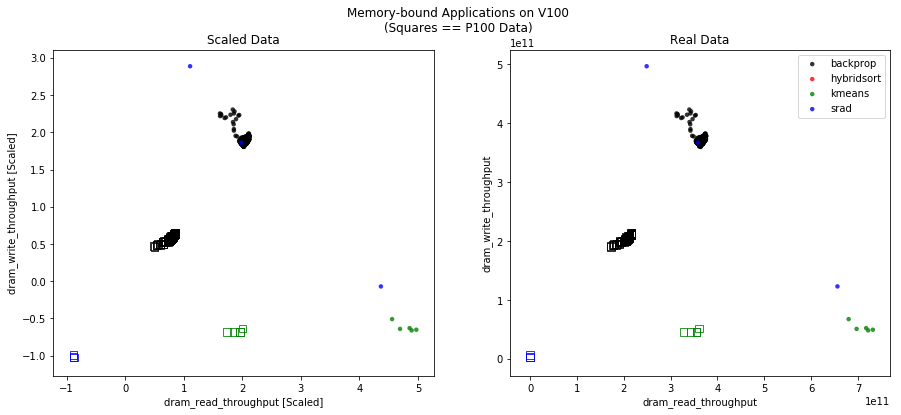

In [243]:
import matplotlib.pyplot as plt

colors = ("black", "red", "green", "blue")
groups = ('backprop', 'hybridsort', 'kmeans', 'srad')

df_plot = df_joined[df_joined['memory_bound_V100'] == 1].copy()
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,6))

for iax, ax in enumerate(axs):
    for arch in ['_V100', '_P100']:
        for color, group in zip(colors, groups):

            dft = df_plot[df_plot['application_name'+arch] == group]

            if iax == 0:
                #import pdb; pdb.set_trace()
                ax.set_title('Scaled Data')
                indices = [int(i) for i in dft['master_index'+arch].values]
                x_col_ind = df_col_ref.columns.get_loc(metric_basis[0])
                y_col_ind = df_col_ref.columns.get_loc(metric_basis[1])
                x = scaled_data_[indices,x_col_ind]
                y = scaled_data_[indices,y_col_ind]
                ax.set_xlabel(metric_basis[0]+' [Scaled]')
                ax.set_ylabel(metric_basis[1]+' [Scaled]')
            else:
                ax.set_title('Real Data')
                x = dft[metric_basis[0]+arch].values
                y = dft[metric_basis[1]+arch].values
                ax.set_xlabel(metric_basis[0])
                ax.set_ylabel(metric_basis[1])

            if arch == '_V100':
                ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=20, marker='o', label=group)
            else:
                ax.scatter(x, y, alpha=0.8, c='none', edgecolors=color, s=60, marker='s')
                

plt.suptitle('Memory-bound Applications on V100\n(Squares == P100 Data)')
plt.legend(loc='best')
plt.show()

,inst_per_warp_V100,kernelname_V100,branch_efficiency_V100,warp_execution_efficiency_V100,warp_nonpred_execution_efficiency_V100,inst_replay_overhead_V100,shared_load_transactions_per_request_V100,shared_store_transactions_per_request_V100,local_load_transactions_per_request_V100,local_store_transactions_per_request_V100,...,flop_hp_efficiency_P100,flop_sp_efficiency_P100,flop_dp_efficiency_P100,sysmem_read_utilization_P100,sysmem_write_utilization_P100,architecture_P100,application_name_P100,input_P100,memory_bound_P100,master_index_P100
unique_index,,,,,,,,,,,,,,,,,,,,,
compress_v1_compress,147.993804,compress,0.999995,0.999996,0.940030,0.002733,0.0,0.0,0.0,0.0,...,0.0,0.018720,0.00000,0.0,1.0,P100,srad,v1_compress,0.0,42600.0
prepare_v1_prepare,125.995389,prepare,0.999995,0.999996,0.953369,0.006496,0.0,0.0,0.0,0.0,...,0.0,0.000633,0.00000,0.0,1.0,P100,srad,v1_prepare,0.0,42602.0
srad2_v1_srad2,192.990562,srad2,0.999995,0.999995,0.948833,0.001809,0.0,0.0,0.0,0.0,...,0.0,0.003873,0.00332,0.0,1.0,P100,srad,v1_srad2,0.0,42605.0


In [238]:
# Now, lets see how predictions for V100 (given P100) compare...
from keras.models import load_model
import keras.backend as K

def weighted_mse(loss_weight):
    def loss(y_true, y_pred):
        loss = K.mean(K.square(y_true - y_pred)*loss_weight)
        return loss
    return loss

loss_weight = np.ones(116)
loss_weight[96] = 100#17
loss_weight[33] = 1#15
loss_weight[34] = 1#14
loss_weight[105] = 1#13
loss_weight[106] = 1#10
model = load_model('bslh_DL_wbias.h5',custom_objects={'loss': weighted_mse(loss_weight)})

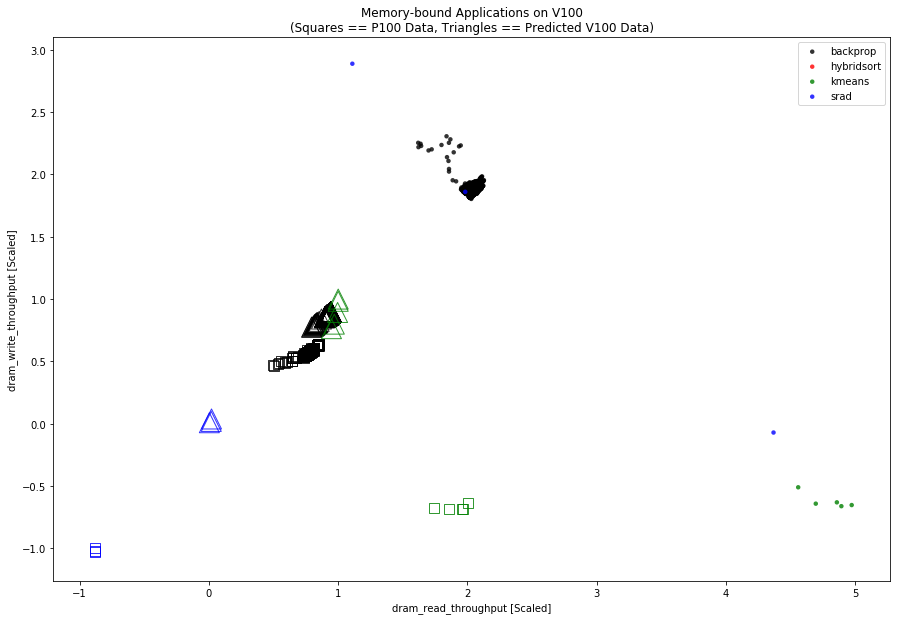

In [239]:
colors = ("black", "red", "green", "blue")
groups = ('backprop', 'hybridsort', 'kmeans', 'srad')

df_plot = df_joined[df_joined['memory_bound_V100'] == 1].copy()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,10))

for color, group in zip(colors, groups):
    df_predict = df_plot[df_plot['application_name_V100'] == group].copy()
    indices_to_predict = [int(i) for i in df_predict['master_index_P100'].values]
    prediction = model.predict(scaled_data_[indices_to_predict])
    
    # Print measured V100 metrics
    indices = [int(i) for i in df_predict['master_index_V100'].values]
    x_col_ind = df_col_ref.columns.get_loc(metric_basis[0])
    y_col_ind = df_col_ref.columns.get_loc(metric_basis[1])
    x = scaled_data_[indices,x_col_ind]
    y = scaled_data_[indices,y_col_ind]
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=20, marker='o', label=group)

    # Print measured P100 metrics
    indices = [int(i) for i in df_predict['master_index_P100'].values]
    x_col_ind = df_col_ref.columns.get_loc(metric_basis[0])
    y_col_ind = df_col_ref.columns.get_loc(metric_basis[1])
    x = scaled_data_[indices,x_col_ind]
    y = scaled_data_[indices,y_col_ind]
    ax.scatter(x, y, alpha=0.8, c='none', edgecolors=color, s=100, marker='s')
    
    # Print V100 predictions (from measured P100 metrics)
    if indices_to_predict: # Need to check that there are predictions to plot here...
        x_col_ind = df_col_ref.columns.get_loc(metric_basis[0])
        y_col_ind = df_col_ref.columns.get_loc(metric_basis[1]) 
        x = prediction[:,x_col_ind]
        y = prediction[:,y_col_ind]   
        ax.scatter(x, y, alpha=0.8, c='none', edgecolors=color, s=400, marker='^')
    
    
plt.xlabel(metric_basis[0]+' [Scaled]')
plt.ylabel(metric_basis[1]+' [Scaled]')
plt.title('Memory-bound Applications on V100\n(Squares == P100 Data, Triangles == Predicted V100 Data)')
plt.legend(loc='best')
plt.show()

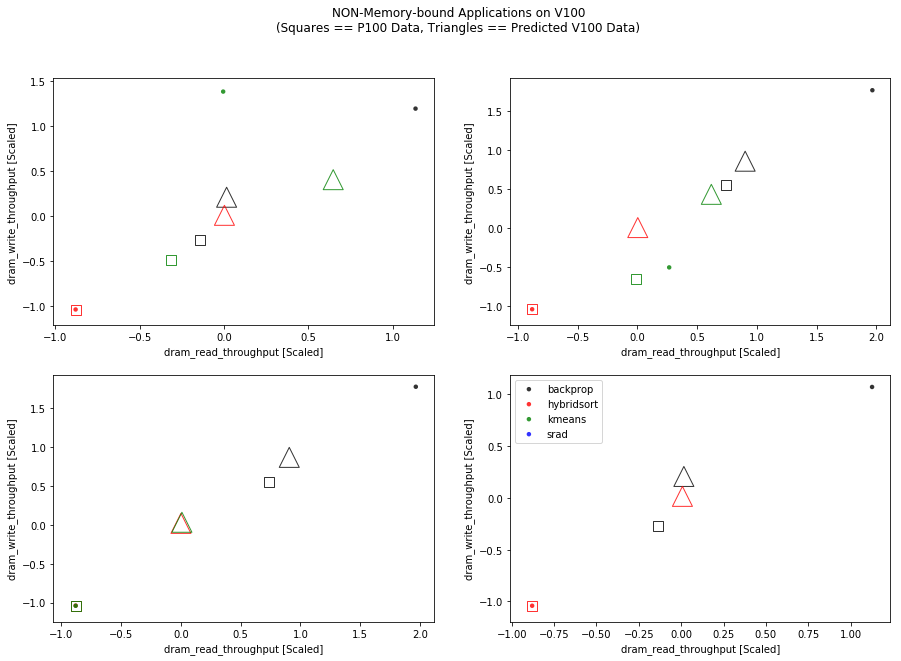

In [240]:
colors = ("black", "red", "green", "blue")
groups = ('backprop', 'hybridsort', 'kmeans', 'srad')

ipoint = 10  # Start with this case
npoints = 1  # Plot this many cases (must be small to make visual sense)

df_plot = df_joined[df_joined['memory_bound_V100'] == 0].copy()
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

axs = [axes[0][0],axes[0][1],axes[1][0],axes[1][1]]

for ix, ax in enumerate(axs):
    ipoint += ix*npoints
    for color, group in zip(colors, groups):
        df_predict = df_plot[df_plot['application_name_V100'] == group].copy()
        indices_to_predict = [int(i) for i in df_predict['master_index_P100'].values]
        prediction = model.predict(scaled_data_[indices_to_predict])

        # Print measured V100 metrics
        indices = [int(i) for i in df_predict['master_index_V100'].values]
        x_col_ind = df_col_ref.columns.get_loc(metric_basis[0])
        y_col_ind = df_col_ref.columns.get_loc(metric_basis[1])
        x = scaled_data_[indices,x_col_ind][ipoint:ipoint+npoints]
        y = scaled_data_[indices,y_col_ind][ipoint:ipoint+npoints]
        ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=20, marker='o', label=group)

        # Print measured P100 metrics
        indices = [int(i) for i in df_predict['master_index_P100'].values]
        x_col_ind = df_col_ref.columns.get_loc(metric_basis[0])
        y_col_ind = df_col_ref.columns.get_loc(metric_basis[1])
        x = scaled_data_[indices,x_col_ind][ipoint:ipoint+npoints]
        y = scaled_data_[indices,y_col_ind][ipoint:ipoint+npoints]
        ax.scatter(x, y, alpha=0.8, c='none', edgecolors=color, s=100, marker='s')

        # Print V100 predictions (from measured P100 metrics)
        if indices_to_predict: # Need to check that there are predictions to plot here...
            x_col_ind = df_col_ref.columns.get_loc(metric_basis[0])
            y_col_ind = df_col_ref.columns.get_loc(metric_basis[1]) 
            x = prediction[:,x_col_ind][ipoint:ipoint+npoints]
            y = prediction[:,y_col_ind][ipoint:ipoint+npoints]
            ax.scatter(x, y, alpha=0.8, c='none', edgecolors=color, s=400, marker='^')
    
        ax.set_xlabel(metric_basis[0]+' [Scaled]')
        ax.set_ylabel(metric_basis[1]+' [Scaled]')

plt.suptitle('NON-Memory-bound Applications on V100\n(Squares == P100 Data, Triangles == Predicted V100 Data)')
plt.legend(loc='best')
plt.show()